<a href="https://colab.research.google.com/github/iceman67/-Python/blob/master/weather_dokdo_island.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### 자료그룹핑 groupby()
 > 월별 풍속구성하기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt

In [ ]:
weather = pd.read_csv('kweather.csv', encoding='CP949')

In [ ]:
type(weather)

pandas.core.frame.DataFrame

In [ ]:
weather.head()

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


In [ ]:
weather.tail()

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4
3652,2020-07-31,25.7,4.8,2.5


In [ ]:
weather.describe()

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
count,3653.000000,3649.000000,3647.000000
mean,12.942102,7.911099,3.936441
std,8.538507,3.029862,1.888473
min,-9.000000,2.000000,0.200000
25%,5.400000,5.700000,2.500000
50%,13.800000,7.600000,3.600000
75%,20.100000,9.700000,5.000000
max,31.300000,26.000000,14.900000


자료에서 월정보만을 얻어오기 위해 $DatetimeIndex()$ 를 사용

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          3653 non-null   object 
 1   평균기온(°C)    3653 non-null   float64
 2   최대 풍속(m/s)  3649 non-null   float64
 3   평균 풍속(m/s)  3647 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB


In [ ]:
weather['month'] = pd.DatetimeIndex(weather['일시']).month

In [ ]:
weather['year'] = pd.DatetimeIndex(weather['일시']).year

In [ ]:
weather.head()

,일시,평균기온,최대 풍속(m/s),평균풍속,month,year
0,2010-08-01,28.7,8.3,3.4,8,2010
1,2010-08-02,25.2,8.7,3.8,8,2010
2,2010-08-03,22.1,6.3,2.9,8,2010
3,2010-08-04,25.3,6.6,4.2,8,2010
4,2010-08-05,27.2,9.1,5.6,8,2010


In [ ]:
month_group = weather.groupby('month').mean()

In [ ]:
month_group

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
month,,,
1,1.598387,8.158065,3.757419
2,2.136396,8.225357,3.946786
3,6.250323,8.871935,4.390291
4,11.064667,9.305017,4.622483
5,16.564194,8.548710,4.219355
6,19.616667,6.945667,3.461000
7,23.328387,7.322581,3.877419
8,24.748710,6.853226,3.596129
9,20.323667,6.896333,3.661667


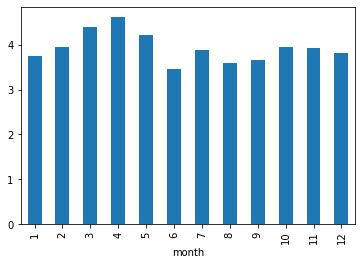

In [ ]:
# y 값 지정, x 값 index
month_group['평균 풍속(m/s)'].plot(kind='bar')

In [ ]:
weather.rename({'평균기온(°C)': '평균기온', '평균 풍속(m/s)': '평균풍속'}, axis=1, inplace=True)

In [ ]:
month_group = weather.groupby('month').mean()

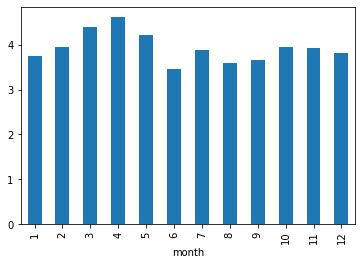

In [ ]:
month_group['평균풍속'].plot(kind='bar')

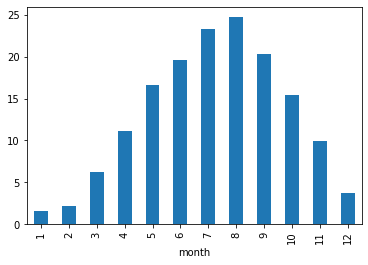

In [ ]:
# 월별 평균 기온을 bar 차트로 시각화 (연중 영상의 기온을 보인다)
month_group['평균기온'].plot(kind='bar')

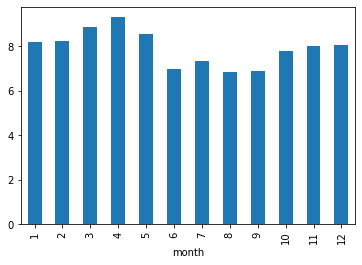

In [ ]:
# 월별 최대풍속을 bar 차트로 시각화
month_group['최대 풍속(m/s)'].plot(kind='bar')